In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

2024-06-25 19:10:54.585457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def list_csv_files(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    return csv_files

In [3]:
def load_and_process_csv(file_path):
    df = pd.read_csv(file_path,header=None)
    return df.iloc[:,:4]    

In [4]:
df = pd.read_csv("shivang51.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7
0,300074,233255,180406,170009,0,0,0,0
1,300107,233298,180506,170026,0,0,0,0
2,300069,233186,180483,170026,0,0,0,0
3,300029,233094,180408,170018,0,0,0,0
4,300065,233188,180442,170023,0,0,0,0


In [5]:
df = df.iloc[:,:4]
df.head()

,0,1,2,3
0,300074,233255,180406,170009
1,300107,233298,180506,170026
2,300069,233186,180483,170026
3,300029,233094,180408,170018
4,300065,233188,180442,170023


In [6]:
len(df)

23446

In [7]:
def extract_center_rows(data, start_range, end_range, length):
    # Ensure that the range is valid
    if start_range > end_range:
        raise ValueError("start_range should be less than or equal to end_range")

    if end_range - start_range<length:
        return False,0
    # Get the rows within the specified range
    range_data = data.loc[start_range:end_range]
    
    # Ensure that the length is not greater than the number of rows in the range
    if length > len(range_data):
        raise ValueError("The specified length is greater than the number of rows in the range")
    
    # Calculate the center of the range
    center_index = len(range_data) // 2
    
    # Calculate the starting and ending indices for the extraction
    start_index = max(0, center_index - length // 2)
    end_index = start_index + length
    
    # Extract the rows from the DataFrame
    center_rows = range_data.iloc[start_index:end_index]
    
    return True,center_rows

In [8]:
numeric_labels = ["one.png","two.jpg","three.jpg","four.jpg","five.jpg","six.jpg","seven.jpg","eight.jpg","nine.jpg"]
non_numeric_label = "animal.jpg"
def process_label(label):
    return label.removesuffix(".png").removesuffix(".jpg")

In [9]:
datashape = (1000,4)

# Y encoding 
0->Numerical , 1-> Non Numerical

In [10]:
def extract_data_between_markers(data, start_marker, end_marker):
    start_idx = data.index[data[0] == start_marker].tolist()[0]
    end_idx = data.index[data[0] == end_marker].tolist()[0]
    return extract_center_rows(data,start_idx,end_idx,datashape[0])

In [11]:
X,Y = [],[]

In [12]:
for f in list_csv_files("."):
    data = load_and_process_csv(f)
    for l in numeric_labels:
        has_data,value = extract_data_between_markers(data,"start "+l,"end "+l)
        if has_data:
            X.append(np.array(value,dtype='float'))
            Y.append(0)

In [13]:
for i in range(9):
    for f in list_csv_files("."):
        data = load_and_process_csv(f)
        has_data,value = extract_data_between_markers(data,"start "+non_numeric_label,"end "+non_numeric_label)
        if has_data:
            X.append(np.array(value,dtype='float'))
            Y.append(1)

In [14]:
X = np.array(X)
Y= np.array(Y)
assert(len(X)==len(Y))
len(Y)

335

In [15]:
X.shape

(335, 1000, 4)

In [16]:
scaler = RobustScaler()
scaler.fit(X[0])
for i,v in enumerate(X):
    X[i] = scaler.transform(v)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [18]:
X_train[:5]

array([[[  13.12548227,   21.84858044,   30.75772358,  -27.66610169],
        [  13.09241227,   21.82460568,   30.59512195,  -27.63220339],
        [  13.06375161,   21.87255521,   30.50840108,  -27.60847458],
        ...,
        [  12.95498806,   21.3022082 ,   32.89322493,  -25.58474576],
        [  12.98438361,   21.22523659,   33.00813008,  -25.69322034],
        [  12.99026272,   21.19747634,   32.96693767,  -25.67627119]],

       [[  60.00624656,  254.40126183, 1848.90840108, 2705.80847458],
        [  60.09663788,  254.28138801, 1849.03848238, 2706.20847458],
        [  60.09884255,  254.27634069, 1849.02330623, 2706.1779661 ],
        ...,
        [  61.71265846,  255.34006309, 1869.3897019 , 2725.83559322],
        [  61.6310858 ,  255.46876972, 1869.34850949, 2725.48983051],
        [  61.58037847,  255.56088328, 1869.34200542, 2725.32372881]],

       [[ -30.51883153,  115.48138801, 1349.57181572, 1951.40847458],
        [ -30.41227264,  115.57223975, 1349.65853659, 1951.4

(array([20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

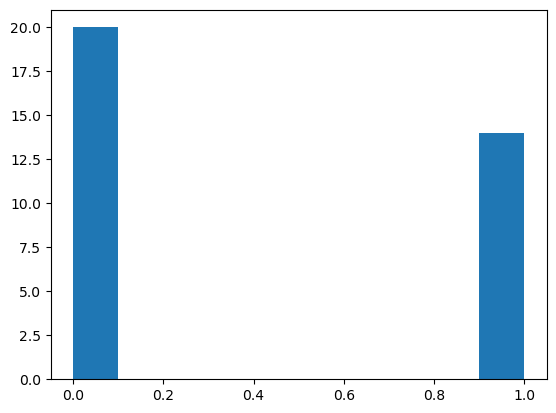

In [19]:
plt.hist(y_test)

In [20]:
model = keras.Sequential([
    keras.layers.Input((datashape[0],datashape[1],1)),
    keras.layers.Conv2D(64,(2,2),activation='relu'),
    keras.layers.Conv2D(32,(2,2),activation='sigmoid'),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid'),
])

2024-06-25 19:11:04.334111: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 19:11:04.790847: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 19:11:04.791066: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [21]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=200,validation_split=0.1)

Epoch 1/200


2024-06-25 19:11:07.360486: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32702464 exceeds 10% of free system memory.
I0000 00:00:1719322867.874387   20564 service.cc:145] XLA service 0x7f65c807ed80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719322867.876552   20564 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-06-25 19:11:07.999693: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-25 19:11:10.543300: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Epoch vs Accuracy")
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], linestyle='--', label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Epoch vs loss")
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], linestyle='--', label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
np.unique(y_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.array([i>0.5 for i in y_pred],dtype='int').ravel()

In [ ]:
np.unique(y_pred)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()